In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [153]:
#Function to display images
def display(img,colmap='gray'):
    fig, ax = plt.subplots(figsize=(6,6))
    ax.imshow(img,cmap=colmap)

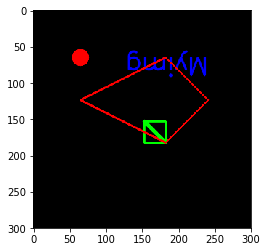

In [9]:
#Drawing on images
img = np.zeros((512,512,3), dtype = np.uint8)
cv2.rectangle(img, (200,200), (250,250), (0,255,0),3)
cv2.circle(img, (400,400), 20, (255,0,0),-1)
cv2.line(img,(200,200), (250,250), (0,255,0),8)
cv2.putText(img, 'Myimg',(100,400),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=2,color=(0,0,255),
           thickness=3,lineType=cv2.LINE_AA)
vertices = np.array([[100,300],[200,200],[400,300],[200,400]],dtype=np.int32)
vertices = vertices.reshape(-1,1,2)
cv2.polylines(img, [vertices], color =(255,0,0),isClosed=True,thickness=3)
img = cv2.resize(img,(300,300))
img=cv2.flip(img,-1)
plt.imshow(img)

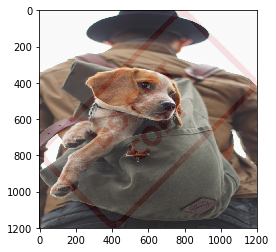

In [35]:
img1 = cv2.imread('./DATA/dog_backpack.jpg')
img2 = cv2.imread('./DATA/watermark_no_copy.png')
#Change color map
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
#Blend images to the same size
img1_resized = cv2.resize(img1,(1200,1200))
img2_resized = cv2.resize(img2,(1200,1200))
blended = cv2.addWeighted(img1_resized, 0.9,img2_resized, 0.1, 0)
plt.imshow(blended)

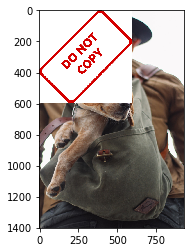

In [34]:
#Overlay images
img2_resized = cv2.resize(img2, (600,600))
large_img = img1
large_img[0:0+img2_resized.shape[1],0:0+img2_resized.shape[0]] = img2_resized
plt.imshow(large_img)

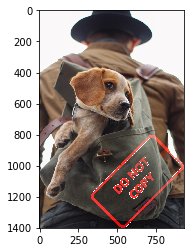

In [36]:
img1 = cv2.imread('./DATA/dog_backpack.jpg')
img2 = cv2.imread('./DATA/watermark_no_copy.png')
#Change color map
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2,(600,600))
#Blend images on different sizes 
x_offset = img1.shape[1] - img2.shape[1]
y_offset = img1.shape[0] - img2.shape[0]
rows, cols, channels = img1.shape
roi = img1[y_offset:img1.shape[0],x_offset:img1.shape[1]]
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
#Invert black to white
mask_inv = cv2.bitwise_not(img2gray)
white_background = np.full(img2.shape, 255, dtype = np.uint8)
#Background
bk = cv2.bitwise_or(white_background,white_background,mask=mask_inv)
#Foreground
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)
final_roi = cv2.bitwise_or(roi,fg)
large_img = img1
large_img[y_offset:y_offset+rows, x_offset:x_offset+cols] = final_roi
plt.imshow(large_img)

In [63]:
#Image Thresholding
img = cv2.imread('./DATA/crossword.jpg',0)
#Pixel value is greater than a threshold value -  one value, else-another value. 
ret1, th1 = cv2.threshold(img, 127, 255,cv2.THRESH_BINARY)
#Calculates a threshold value from image histogram for a bimodal image
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#Calculates the threshold for a small regions of the image. 
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
th4 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

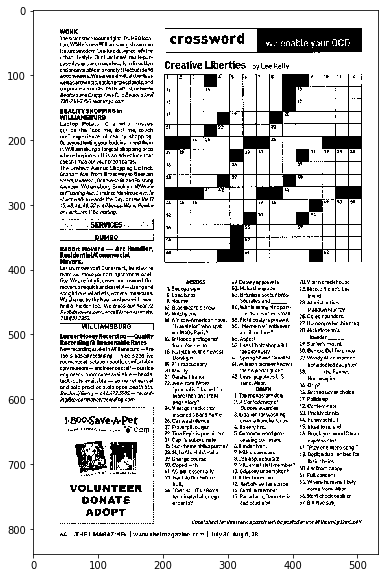

In [68]:
display(th2)

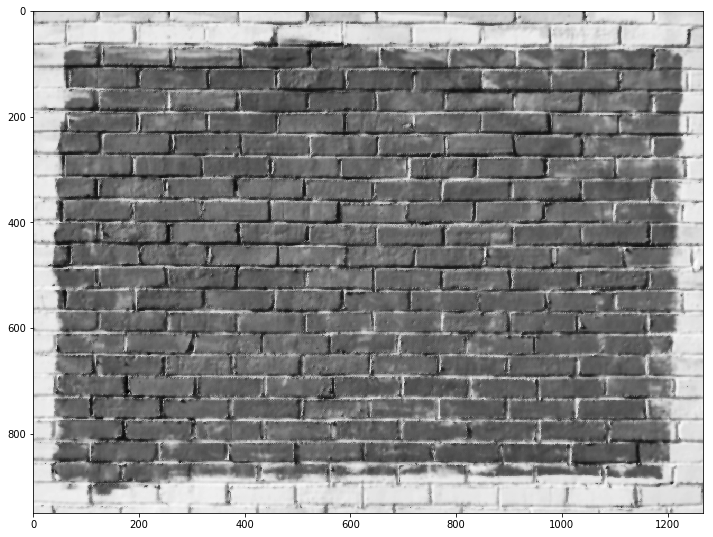

In [77]:
#Smothing with averaging
img = cv2.imread('./DATA/bricks.jpg',0)
#2d Conv Filter
kernel= np.ones(shape=(5,5),dtype=np.float32)/25
img1 = cv2.filter2D(img, -1, kernel)
#Averaging
blur = cv2.blur(img, (15,15))
#Gaussian Filter
blur = cv2.GaussianBlur(img, (5,5), 5)
#Median Filtering
median = cv2.medianBlur(img,5)
#Bilateral Filter - not blur edges
blur = cv2.bilateralFilter(img,9,75,75)
display(blur)

In [114]:
#Morphological Operators
img=np.zeros((600,600))
cv2.putText(img,text='ABCDE',org=(50,300),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=5,color=(255,255,255),thickness=25)
white_noise = np.random.randint(low=0,high=2,size=(600,600))
noise_img = white_noise*255 + img
#Erosion
erosion = cv2.erode(noise_img,kernel,iterations = 1)
#Dilation
dilation = cv2.dilate(erosion,kernel,iterations = 1)
#Opening - erosion followed by dilation (removing noise)
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)
#Closing. Dilation followed by Erosion. (closing small holes inside the foreground objects)
closing = cv2.morphologyEx(noise_img, cv2.MORPH_CLOSE, kernel)
#Morphological Gradient - difference between dilation and erosion of an image.
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
#TopHat - difference between input image and Opening of the image.
tophat = cv2.morphologyEx(noise_img, cv2.MORPH_TOPHAT, kernel)
#BlackHat - difference between the closing of the input image and input image.
blackhat = cv2.morphologyEx(noise_img, cv2.MORPH_BLACKHAT, kernel)
#StructuringElement - returns structuring element further passed to erode(),dilate().. or construct binary mask
structur = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
struct = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,structur)

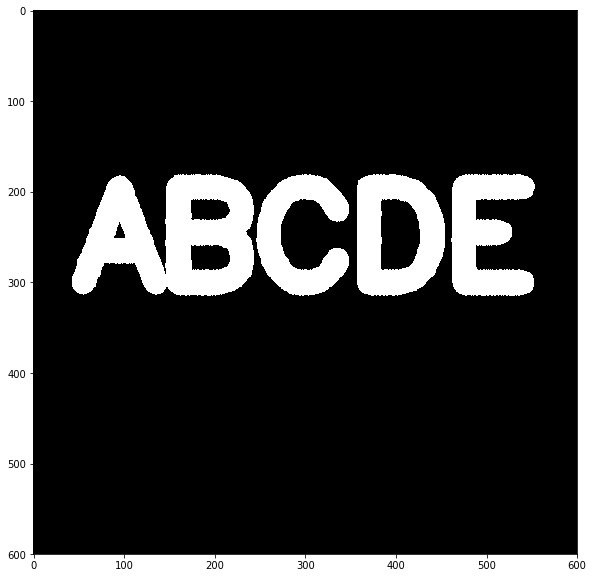

In [115]:
display(struct)

In [116]:
#Edge Detection - Sobel and Laplacian gradients
img = cv2.imread('./DATA/sudoku.jpg',0)
#vertical edges
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
#horizontal edges
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
#Split
blended = cv2.addWeighted(src1=sobelx,alpha=0.5,src2=sobely,beta=0.5,gamma=0)
#Laplacian
laplacian = cv2.Laplacian(img,cv2.CV_64F)

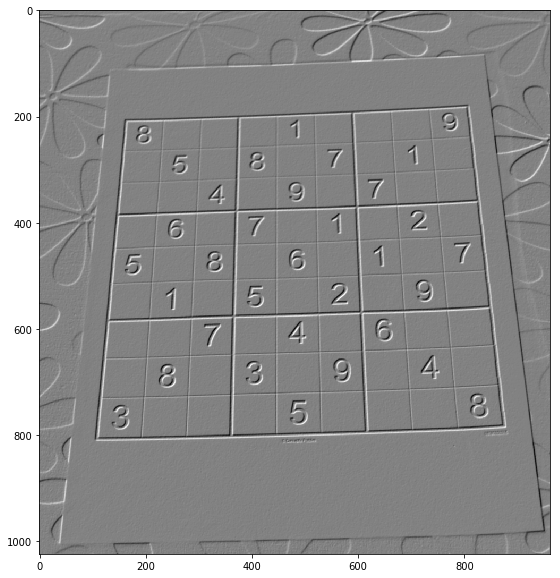

In [117]:
display(blended)

Text(0.5,1,'Histogram for Blue Bricks')

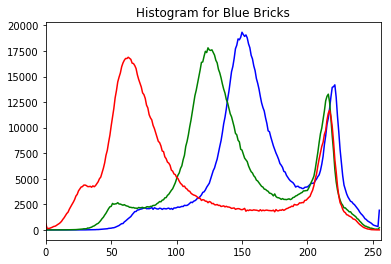

In [118]:
#Color Histograms
blue_bricks = cv2.imread('./DATA/bricks.jpg')
img = blue_bricks
color = ('b','g','r')
for i,col in enumerate(color):
    histr=cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])
plt.title('Histogram for Blue Bricks')

In [119]:
#Template matching

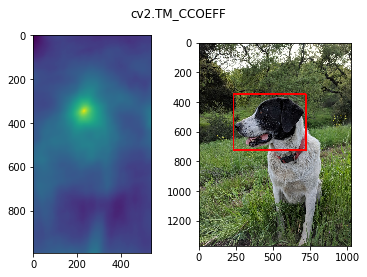

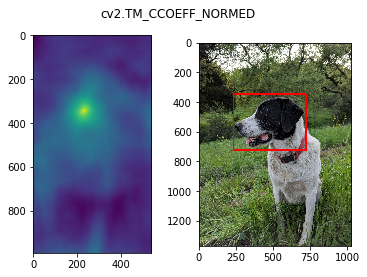

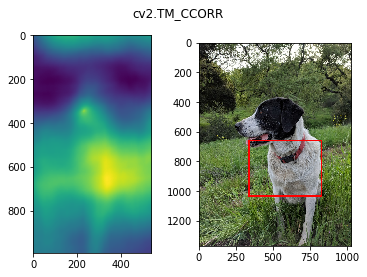

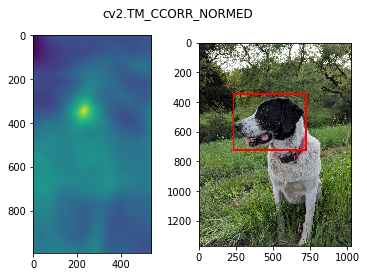

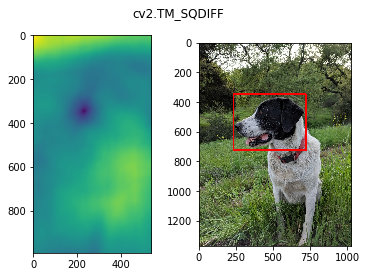

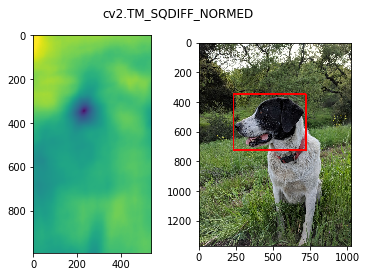

In [121]:
full = cv2.imread('./DATA/sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)
face = cv2.imread('./DATA/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
# Methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 
           'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for m in methods:
    full_copy = full.copy()
    method = eval(m) #convert string to function
    # template matching
    res = cv2.matchTemplate(full_copy,face,method)
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc 
    height, width,channels = face.shape
    bottom_right = (top_left[0]+width,top_left[1]+height)
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    # PLOT AND SHOW IMAGES
    plt.subplot(121)
    plt.imshow(res)
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.suptitle(m)
    plt.show()
    print('\n')
    print('\n')    

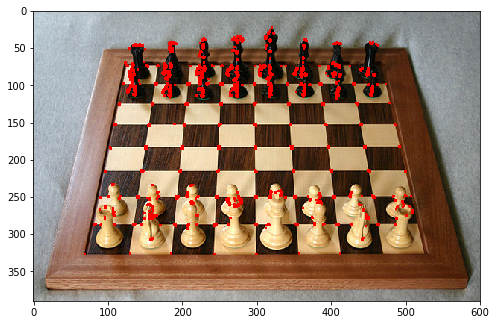

In [138]:
#Harris Corner Detcetion
real_chess = cv2.imread('./DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
real_chess_gray = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
real_chess_float = np.float32(real_chess_gray)
dst = cv2.cornerHarris(src=real_chess_float,blockSize=2,ksize=3,k=0.03)
dst = cv2.dilate(dst, None)
real_chess[dst> 0.01*dst.max()] = [255,0,0]
display(real_chess)

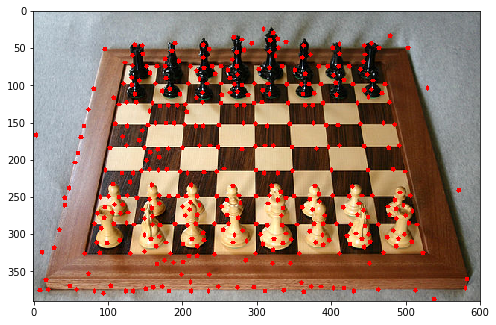

In [146]:
# Shi - Tomasi Detection
real_chess = cv2.imread('./DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
corners = cv2.goodFeaturesToTrack(real_chess_gray,0,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y), 3, [255,0,0],-1)
display(real_chess)

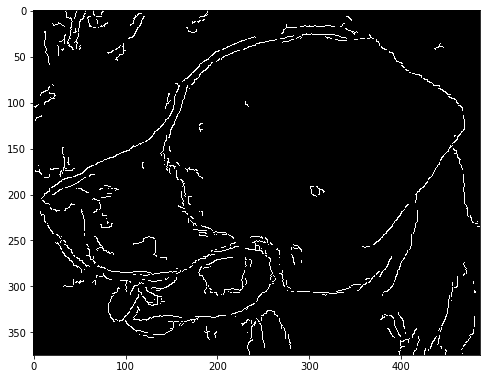

In [151]:
#Edge Detection
img = cv2.imread('./DATA/sammy_face.jpg')
edges = cv2.Canny(image=img,threshold1=127,threshold2=127)
#Selecting Canny Thresholding
med_val = np.median(img)
# lower threshold to either 0 or 70% of the median val, whichever is greater
lower = int(max(0,0.7*med_val))
# upper threshold to either 1300% of the median val or 255, whichever is smaller
upper = int(min(255,1.3*med_val))
#Blurring before
blurred_img = cv2.blur(img,ksize=(9,9))
edges = cv2.Canny(image=blurred_img,threshold1=lower,threshold2=upper)
display(edges)

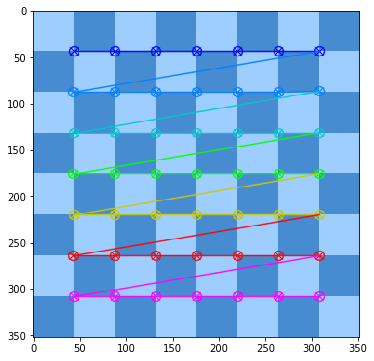

In [154]:
#Grid Detection
flat_chess = cv2.imread('./DATA/flat_chessboard.png')
found,corners = cv2.findChessboardCorners(flat_chess,(7,7))
cv2.drawChessboardCorners(flat_chess,(7,7),corners,found)
display(flat_chess)

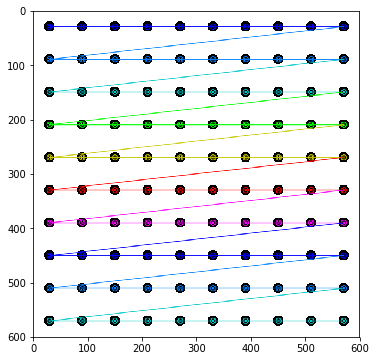

In [157]:
#Grid Detection - Circles
dots = cv2.imread('./DATA/dot_grid.png')
found,corners = cv2.findCirclesGrid(dots,(10,10), cv2.CALIB_CB_SYMMETRIC_GRID)
cv2.drawChessboardCorners(dots,(10,10),corners,found)
display(dots)

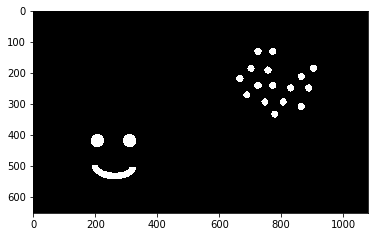

In [173]:
#Find Contours
img = cv2.imread('./DATA/internal_external.png',0)
contours, hierarchy = cv2.findContours(img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
external_contours = np.zeros(img.shape)
#External Contours
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(external_contours,contours,i,255,-1)
display(external_contours)
#Internal Contours
internal_contours = np.zeros(img.shape)
for i in range(len(contours)):
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(internal_contours,contours,i,255,-1)
plt.imshow(internal_contours,cmap='gray')

In [175]:
#Feature Mapping

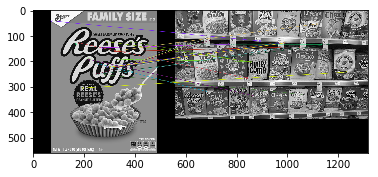

In [176]:
reeses = cv2.imread('./DATA/reeses_puffs.png',0)
cereals = cv2.imread('./DATA/many_cereals.jpg',0)
# BruteForce with ORB Descriptors
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key=lambda x:x.distance)
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_matches)

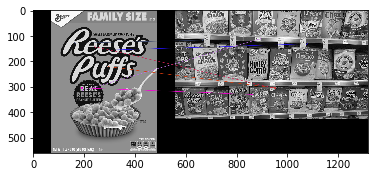

In [185]:
#Knn Match
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
good = []
for match1,match2 in matches:
    if match1.distance < 0.8*match2.distance: #less distance - better match
        good.append([match1])
reeses_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(reeses_matches)

In [189]:
# # FLANN BASED MATCHER
# sift = cv2.xfeatures2d.SIFT_create()
# kp1, des1 = sift.detectAndCompute(reeses,None)
# kp2, des2 = sift.detectAndCompute(cereals,None)
# FLANN_NDEX_KDTREE = 0
# flann = cv2.FlannBasedMatcher(dict(algorithm=FLANN_NDEX_KDTREE,trees=5),dict(checks=50))
# matches = flann.knnMatch(des1,des2,k=2)
# matchesMask = [[0,0] for i in range(len(matches))]
# for i,(match1,match2) in enumerate(matches):
#     if match1.distance < 0.75*match2.distance:
#         matchesMask[i]=[1,0]
# draw_params = dict(matchColor=(0,255,0),singlePointColor=(255,0,0),matchesMask=matchesMask,flags=0)
# reeses_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

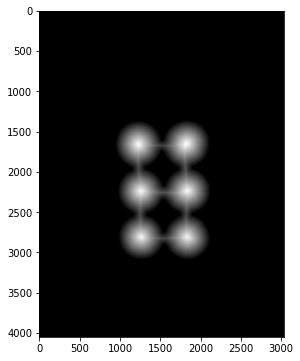

In [194]:
# Watershed algorithm
img = cv2.imread('./DATA/pennies.jpg')
img = cv2.medianBlur(img, 35) #blurring
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #converting to gray
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) #thresholding
kernel = np.ones((3,3),dtype=np.uint8)
opening=cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel,iterations=2 ) #noise removal
sure_bg = cv2.dilate(opening,kernel,iterations=3) #background
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5) #perfoming distance transformation
display(dist_transform)

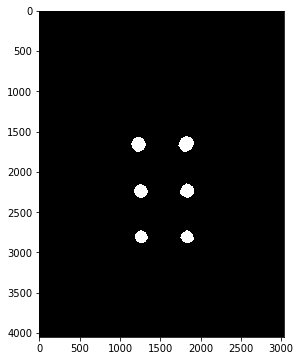

In [197]:
ret,sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255,0)
display(sure_fg)

In [207]:
unknown = cv2.subtract(sure_bg, np.uint8(sure_fg)) #unknown region
ret, markers = cv2.connectedComponents(np.uint8(sure_fg)) #label markers for watershed algorithm
markers = markers+1
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
contours, hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)#contours
sep_coins = cv2.imread('./DATA/pennies.jpg')
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours,i,(255,0,0),7)

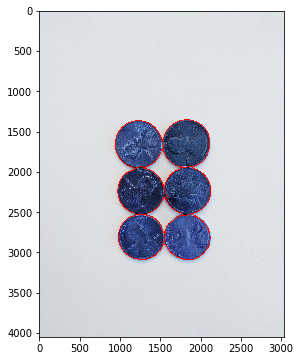

In [208]:
display(sep_coins)

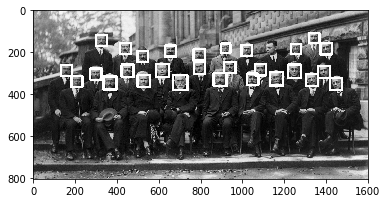

In [211]:
#Face Detection
solvay = cv2.imread('./DATA/solvay_conference.jpg',0)
face_cascade = cv2.CascadeClassifier('./DATA/haarcascades/haarcascade_frontalface_default.xml')
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.2,minNeighbors=5)
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    return face_img
result = detect_face(solvay)
display(result)

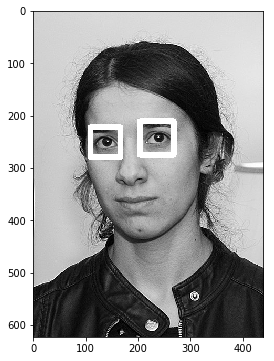

In [214]:
nadia = cv2.imread('./DATA/Nadia_Murad.jpg',0)
eye_cascade = cv2.CascadeClassifier('./DATA/haarcascades/haarcascade_eye.xml')
def detect_eyes(img):
    face_img = img.copy()
    eyes_rects = eye_cascade.detectMultiScale(face_img)
    for (x,y,w,h) in eyes_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    return face_img
result = detect_eyes(nadia)
display(result)